<a href="https://colab.research.google.com/github/jrDhiraj/crop_yield-prediction/blob/main/Crop_yeild_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/yield_df.csv')

In [ ]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df = df.drop('Unnamed: 0', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
df.duplicated().sum()

np.int64(2310)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [ ]:
 df['average_rain_fall_mm_per_year']

,average_rain_fall_mm_per_year
0,1485.0
1,1485.0
2,1485.0
3,1485.0
4,1485.0
...,...
28237,657.0
28238,657.0
28239,657.0
28240,657.0


In [ ]:
def isStr(obj):
  try:
    float(obj)
    return False
  except:
    return True

In [ ]:
toDrop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [ ]:
toDrop

Index([], dtype='int64')

In [ ]:
df = df.drop(toDrop)

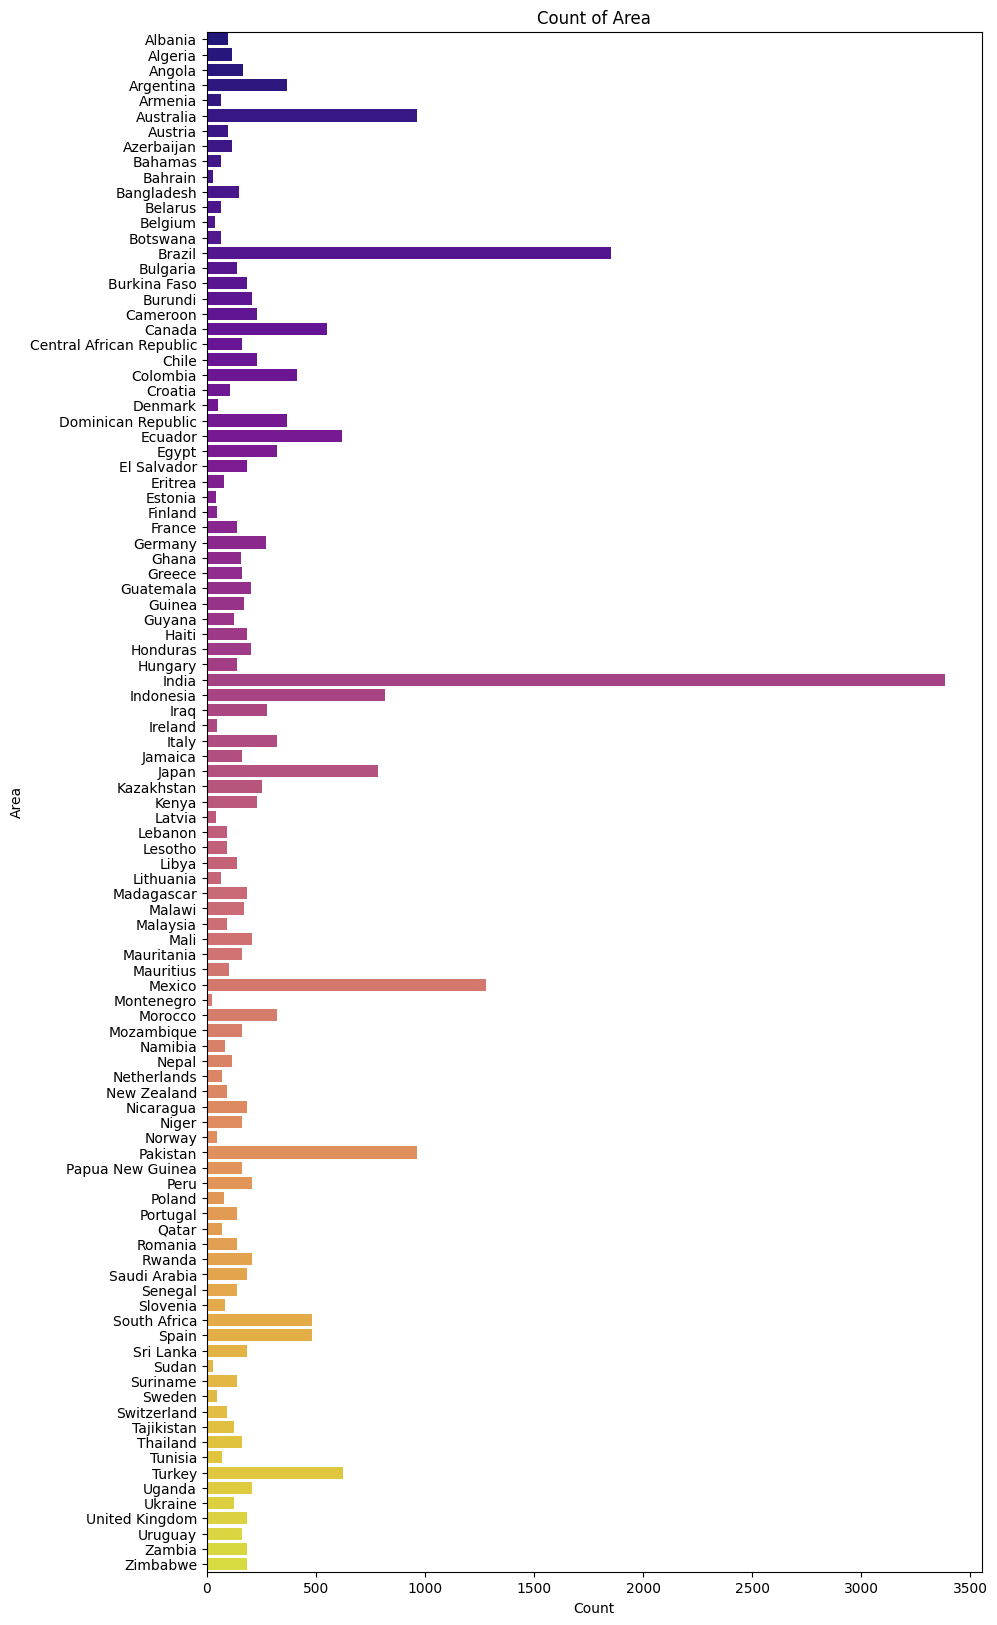

In [ ]:
plt.figure(figsize = (10,20))
sns.countplot(df['Area'], palette = 'plasma')
plt.xlabel('Count')
plt.ylabel('Area')
plt.title('Count of Area')
plt.show()

In [ ]:
df.head(5)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
country = df['Area'].unique()

In [ ]:
yield_per_country = []
for state in country:
  yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

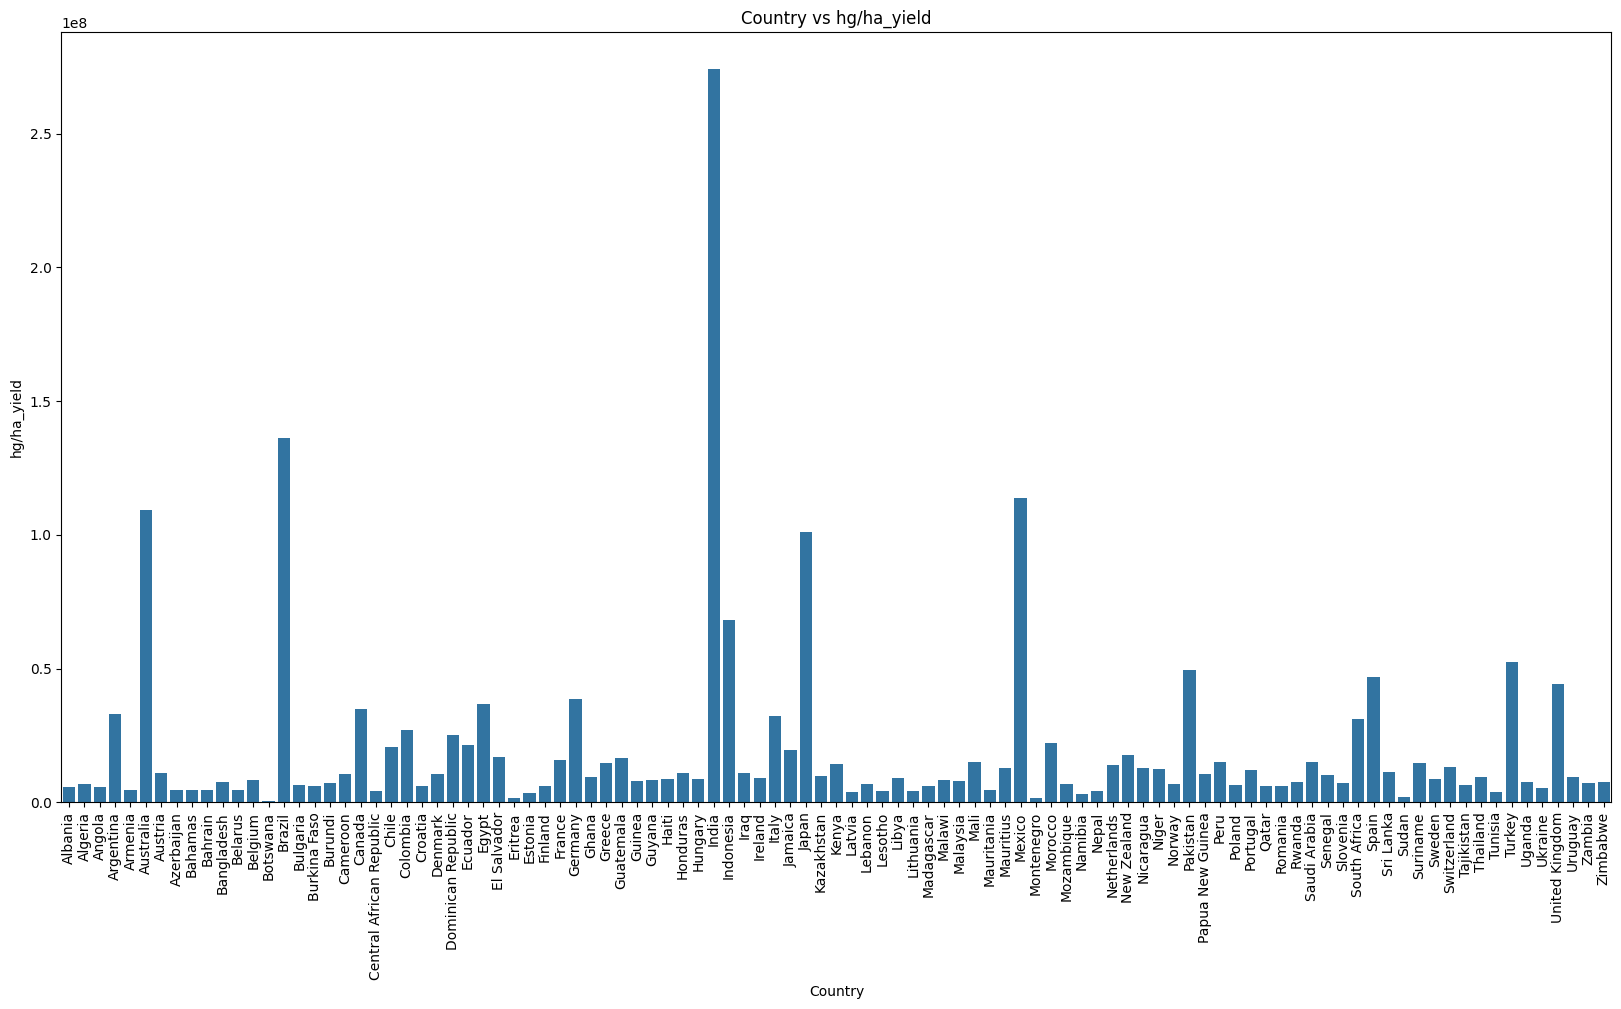

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = country, y = yield_per_country)
plt.xlabel('Country')
plt.ylabel('hg/ha_yield')
plt.title('Country vs hg/ha_yield')
plt.xticks(rotation = 90)
plt.show()

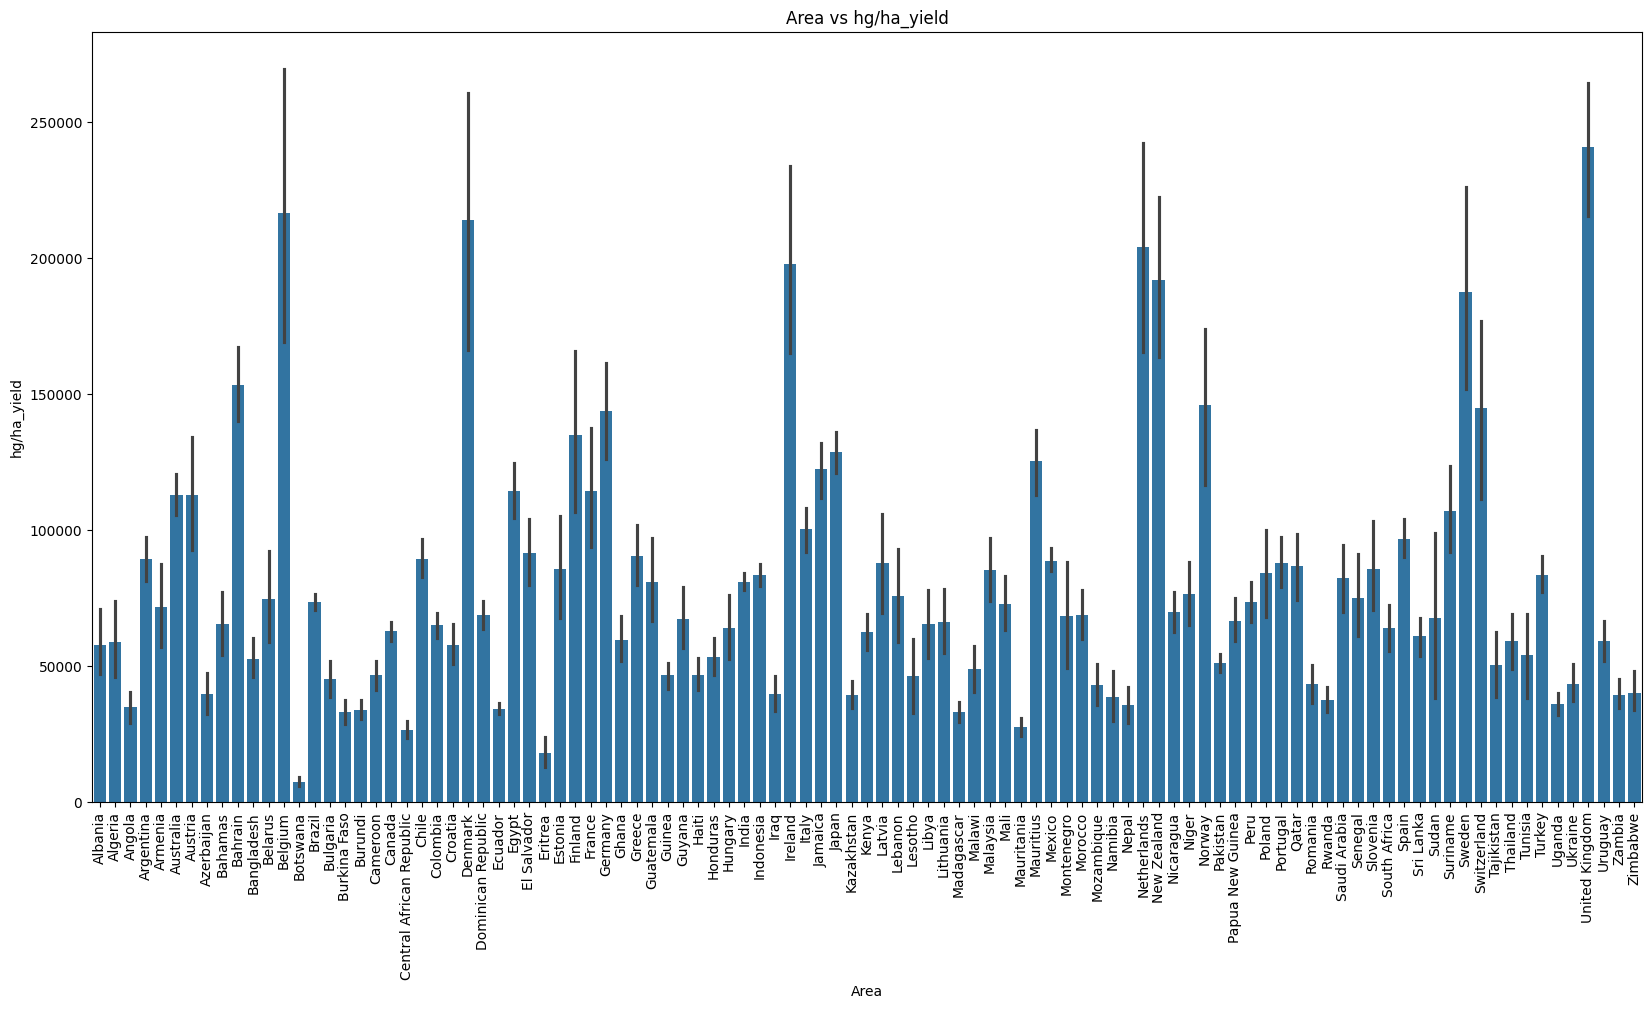

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(data = df , x = 'Area', y= 'hg/ha_yield')
plt.xlabel('Area')
plt.ylabel('hg/ha_yield')
plt.title('Area vs hg/ha_yield')
plt.xticks(rotation = 90)
plt.show()

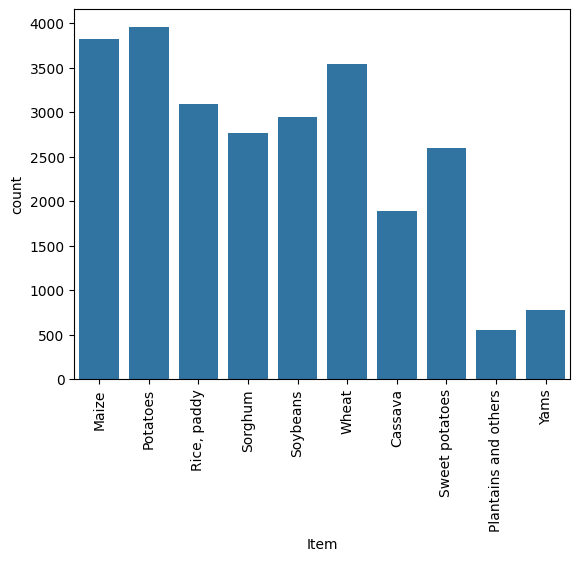

In [ ]:
sns.countplot(x = df['Item'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
crops = df['Item'].unique()
yeild_per_iteam = []
for crop in crops:
  yeild_per_iteam.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

Text(0.5, 1.0, 'Item vs hg/ha_yield')

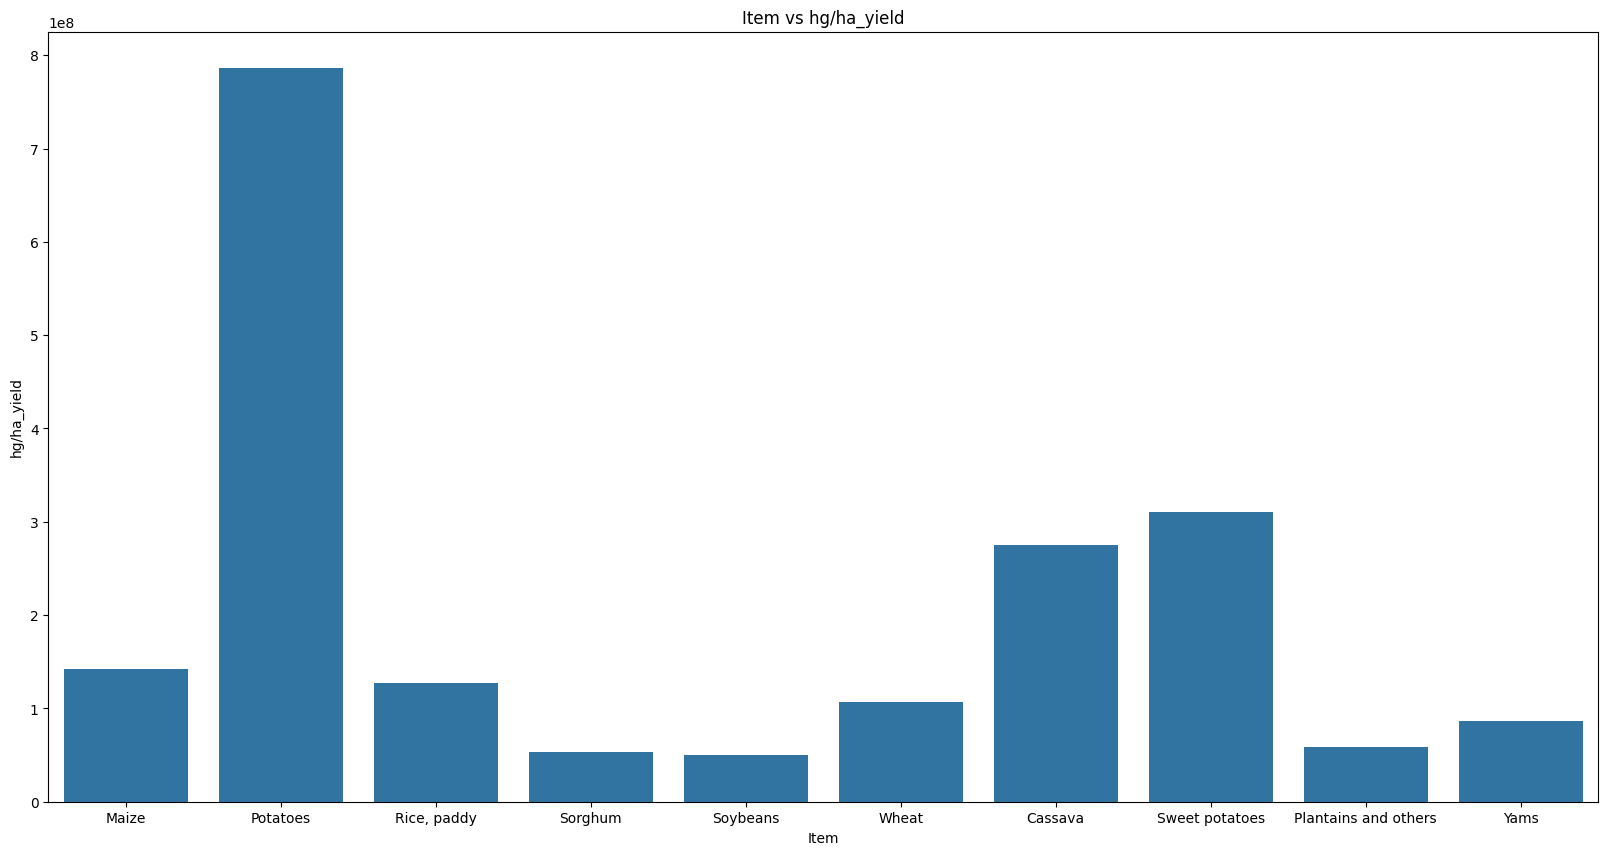

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = crops, y = yeild_per_iteam)
plt.xlabel('Item')
plt.ylabel('hg/ha_yield')
plt.title('Item vs hg/ha_yield')

Train test split

In [ ]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [ ]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Convert categorical to numerical and scale Standardization

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
ohe = OneHotEncoder()
scaler = StandardScaler()

In [ ]:
X_train.head(1)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
24234,Saudi Arabia,Sorghum,2000,59.0,3024.11,26.55


In [ ]:
preprocessor = ColumnTransformer(
  transformers=[
      ('oneHotEncoder', ohe, [0,1]),
      ('StandardScaler',scaler,[2,3,4,5] )
  ]
  ,remainder = 'passthrough'
)

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('oneHotEncoder', OneHotEncoder(), [0, 1]),
                                ('StandardScaler', StandardScaler(),
                                 [2, 3, 4, 5])])

In [ ]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

Train Models

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor()
}
